In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'state-farm-distracted-driver-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F5048%2F868335%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240407%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240407T203146Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da4708183ab604d3b56b479621e0d768d63a9d1f470754efca5af71dd4fb4a4650aafb5e164152e429aa962a2a87c6571b278ae802954e484de4a709cb9de01d05322b3ecbd8a057d5f56a13ea79f097240b343f60b6d5cd15bf6aca1adeb7b765cecbc1e059880e761220f2d5f4fe24d56c05fca9a0607759e70a2108704e6fdceab1b3c4f6e678a356629836afa7eb9e515cfb93f790df9c2ecbb433be462b2fd58724dfa48d04a596c87ea86049c16c3100ed04e08c877d2db6942f7afe7a0397eb27dd22ba7226cc80c0db057ecada75ac3aaacb090725320e0d731daaef289c4bcd5016c9a34f372bf67929a3cca93aee18f4a95a6d96b5ec317d6eb9c4a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4296022692 bytes downloaded
Downloaded and uncompressed: state-farm-distracted-driver-detection
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_60763.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_30244.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_24778.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_22187.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_5178.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_46413.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_66955.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_37876.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_2405.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_76394.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_75261.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_48320.jpg
/kaggle/input/state-farm-di

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_60667.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_16069.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_74781.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_72578.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_98353.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_27111.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_45415.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_56086.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_37052.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_16860.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_81695.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_76789.jpg
/kaggle/input/state-farm-

In [ ]:
!pip install split-folders

In [ ]:
import cv2
import splitfolders
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [ ]:
df = pd.read_csv("/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv")
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 525.7+ KB


# Classes

In [ ]:
df['classname'].unique()

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype=object)

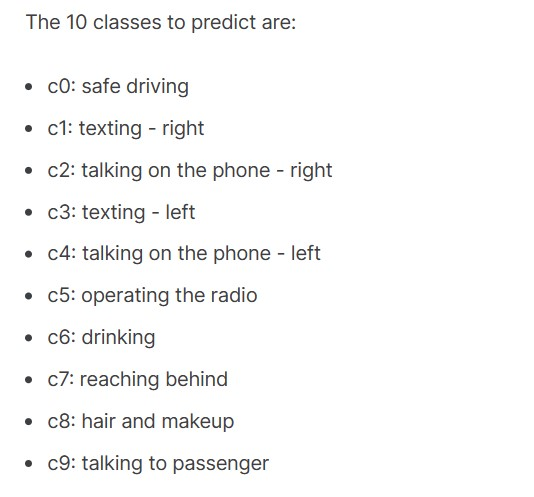

# Displaying Samples

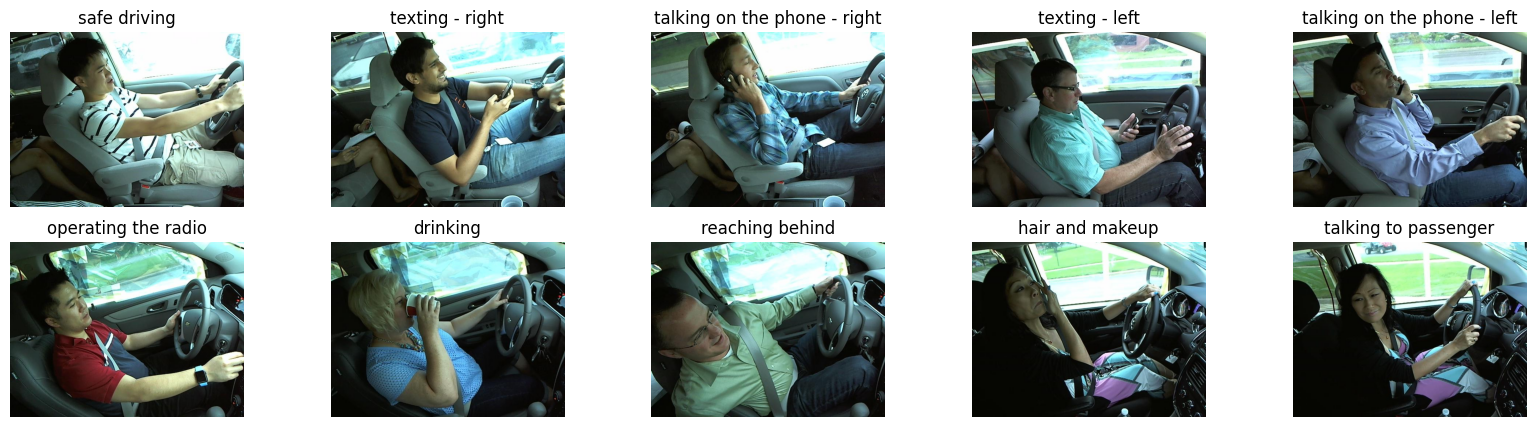

In [ ]:
state = ['safe driving', 'texting - right', 'talking on the phone - right', 'texting - left', 'talking on the phone - left',
         'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger', 'UNKNOWN']

def Display(path, Class=None):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, Class+1)
    plt.title(state[Class])
    plt.imshow(img)
    plt.axis("off")

plt.figure(figsize=(20, 5))

classes = df['classname'].unique()
for i in range(len(classes)):
  Display(f"/kaggle/input/state-farm-distracted-driver-detection/imgs/train/{classes[i]}/{df.loc[df['classname'] == classes[i], 'img'].iloc[i*200]}", i)


# spliting to train and validation

In [ ]:
train_dir = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
splitfolders.ratio(train_dir, output='/kaggle/working/data_file',
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 22424 files [00:10, 2202.37 files/s]


In [ ]:
batch_size = 128
img_size = 256
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory('/kaggle/working/data_file/train', batch_size = batch_size, target_size= (img_size, img_size))

val_data = datagen.flow_from_directory('/kaggle/working/data_file/val', batch_size = batch_size, target_size= (img_size, img_size))

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


# Baseline Dense layers model


In [ ]:
dense_model = models.Sequential()
dense_model.add(Flatten(input_shape=(img_size, img_size, 3)))
dense_model.add(Dense(512, activation='relu'))
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dense(128, activation='relu'))
dense_model.add(Dense(10, activation='softmax'))
dense_model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
dense_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               100663808 
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 100829322 (384.63 MB)
Trainable params: 100829322 (384.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
dense_model.fit(train_data ,epochs=10,validation_data = val_data)

Epoch 1/10
141/141 [==============================] - 90s 617ms/step - loss: 10.9671 - accuracy: 0.3480 - val_loss: 1.0647 - val_accuracy: 0.6644
Epoch 2/10
141/141 [==============================] - 86s 610ms/step - loss: 0.6653 - accuracy: 0.8228 - val_loss: 0.6679 - val_accuracy: 0.7822
Epoch 3/10
141/141 [==============================] - 87s 618ms/step - loss: 0.3683 - accuracy: 0.9169 - val_loss: 0.2508 - val_accuracy: 0.9578
Epoch 4/10
141/141 [==============================] - 87s 620ms/step - loss: 0.2551 - accuracy: 0.9419 - val_loss: 0.2537 - val_accuracy: 0.9333
Epoch 5/10
141/141 [==============================] - 87s 616ms/step - loss: 0.1460 - accuracy: 0.9724 - val_loss: 0.1678 - val_accuracy: 0.9612
Epoch 6/10
141/141 [==============================] - 85s 606ms/step - loss: 0.1784 - accuracy: 0.9573 - val_loss: 0.1093 - val_accuracy: 0.9761
Epoch 7/10
141/141 [==============================] - 87s 615ms/step - loss: 0.0786 - accuracy: 0.9848 - val_loss: 0.0984 - val_a

In [ ]:
dense_model.save('/kaggle/working/dense_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Baseline CNN model

In [ ]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3), name='input'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation='relu'))
cnn_model.add(layers.Dense(256, activation='relu'))
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax', name='output'))

cnn_model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
cnn_model.fit(train_data ,epochs=10,validation_data = val_data)

Epoch 1/10
141/141 [==============================] - 111s 704ms/step - loss: 1.0285 - accuracy: 0.6549 - val_loss: 0.1194 - val_accuracy: 0.9703
Epoch 2/10
141/141 [==============================] - 93s 657ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0632 - val_accuracy: 0.9826
Epoch 3/10
141/141 [==============================] - 94s 663ms/step - loss: 0.0224 - accuracy: 0.9934 - val_loss: 0.0324 - val_accuracy: 0.9886
Epoch 4/10
141/141 [==============================] - 94s 666ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.0419 - val_accuracy: 0.9866
Epoch 5/10
141/141 [==============================] - 97s 687ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0328 - val_accuracy: 0.9893
Epoch 6/10
141/141 [==============================] - 93s 662ms/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0316 - val_accuracy: 0.9922
Epoch 7/10
141/141 [==============================] - 92s 654ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0207 - val_a

# Data Augmentation

In [ ]:
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.10,
    horizontal_flip=True,
    fill_mode="nearest")


train_data = datagen_aug.flow_from_directory('/kaggle/working/data_file/train', batch_size = batch_size, target_size= (img_size, img_size))



Found 17934 images belonging to 10 classes.


In [ ]:
data_aug_model = models.Sequential()
data_aug_model.add(layers.Conv2D(32,(3,3), activation='relu', name='input', input_shape=(img_size,img_size, 3)))
data_aug_model.add(layers.MaxPooling2D((2, 2)))
data_aug_model.add(layers.Conv2D(64,(3,3), activation='relu'))
data_aug_model.add(layers.MaxPooling2D((2, 2)))
data_aug_model.add(layers.Conv2D(128,(3,3), activation='relu'))
data_aug_model.add(layers.MaxPooling2D((2, 2)))
data_aug_model.add(layers.Flatten())
data_aug_model.add(layers.Dense(512, activation='relu'))
data_aug_model.add(layers.Dropout(0.4))
data_aug_model.add(layers.Dense(256, activation='relu'))
data_aug_model.add(layers.Dropout(0.4))
data_aug_model.add(layers.Dense(128, activation='relu'))
data_aug_model.add(layers.Dense(10, activation='softmax'))

data_aug_model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
data_aug_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
data_aug_model.fit(train_data ,epochs=10,validation_data = val_data)

Epoch 1/10
  7/141 [>.............................] - ETA: 53:06 - loss: 2.7385 - accuracy: 0.1016

# Transfer Learning